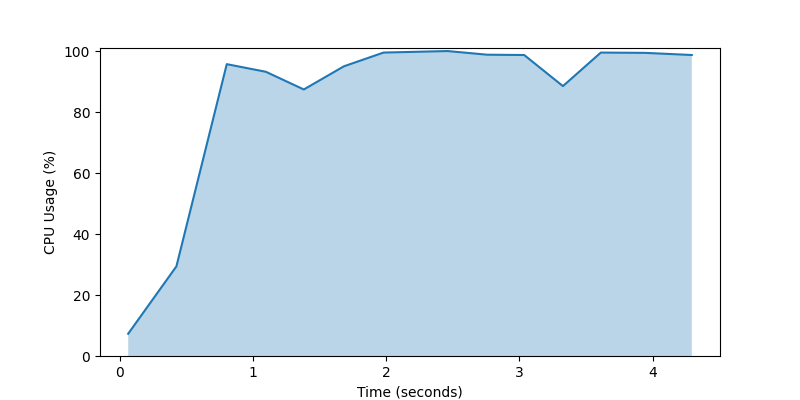

Output()

Found 547 successful system designs from exploring 1001 contracts.
Total time 4.382633209228516 running on AMD Ryzen Threadripper PRO 3955WX 16-Cores @ 3.8927 GHz with up to 32 threads.
Pacti compose,quotient,merge statistics:
compose invocation counts: (min: 4, max: 168, avg: 83.34465534465535, total: 83428)
min/max compose contract size: (constraints: 2, variables: 2)/(constraints: 6, variables: 6)
no quotient operations
no merge operations
Pacti PolyhedralTermList statistics:
no contains_behavior operations
Pacti PolyhedralCompoundContract statistics:
no compound_merge operations



In [1]:
from scalability import *
from pacti_counters import PactiInstrumentationData, summarize_instrumentation_data
from p_tqdm import p_umap
from cpu_usage_plot import cpu_usage_plot

from cpuinfo import get_cpu_info
cpu_info = get_cpu_info()
cpu_info_message = f"{cpu_info['brand_raw']} @ {cpu_info['hz_advertised_friendly']} with up to {cpu_info['count']} threads."

def explore_combination_params(params) -> Tuple[PactiInstrumentationData, Optional[PolyhedralContract]]:
    return explore_combination(*params)

# Get all possible combinations of sensors from the library
number_of_sensors = 4
all_combinations = list(itertools.combinations(sensor_library.keys(), number_of_sensors))
num_contracts = len(all_combinations)

with cpu_usage_plot(finally_clear_output=True):
    t0 = time.time()
    results = p_umap(explore_combination_params, list(enumerate(all_combinations)))
    tf = time.time()

stats = summarize_instrumentation_data([result[0] for result in results])
filtered_results = [result[1] for result in results if result[1]]

print(
    f"Found {len(filtered_results)} successful system designs from exploring {num_contracts} contracts.\n"
    f"Total time {tf-t0} running on {cpu_info_message}\n"
    f"{stats.stats()}"
)
